In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

import torchvision
from torchvision import transforms

import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


C:\Users\matth\anaconda3\envs\aiclass\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


In [11]:
#f_train = pd.read_csv("Data/fashion-mnist_train.csv")
#f_test = pd.read_csv("Data/fashion-mnist_test.csv")

ftrain = torchvision.datasets.FashionMNIST("./Data",download=True,transform=transforms.Compose([transforms.ToTensor()]))
ftest =  torchvision.datasets.FashionMNIST("./Data", download=True, train=False, transform=transforms.Compose([transforms.ToTensor()]))

ftrn_load = torch.utils.data.DataLoader(ftrain, batch_size = 1000,shuffle = True)
ftst_load = torch.utils.data.DataLoader(ftest, batch_size = 1000,shuffle = False)



In [3]:
#model
class model (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784,196)
        self.l2 = nn.Linear(196,49)
        self.l3 = nn.Linear(49,10)
        self.tanh = nn.Tanh()
    def forward(self, x):
        x = self.tanh(self.l1(x))
        x = self.tanh(self.l2(x))
        x = self.l3(x)
        return x
model = model()
model.to(device)

model(
  (l1): Linear(in_features=784, out_features=196, bias=True)
  (l2): Linear(in_features=196, out_features=49, bias=True)
  (l3): Linear(in_features=49, out_features=10, bias=True)
  (tanh): Tanh()
)

In [4]:
def training(train_loader,test_loader,model,opti,name,num_epoch,lrr=0.0001,wd=0,save_model=0):
    t0 = time.time()
    if opti =="CEL":
        criterion = nn.CrossEntropyLoss()
    elif opti =="MSE":
        criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(),lr=lrr,weight_decay = wd, momentum=0.9)
    
    loss_train_array = torch.zeros(num_epoch)
    acc_training_array = torch.zeros(num_epoch)
    acc_array = torch.zeros(num_epoch)
    
    i=0
    for epoch in range(num_epoch):
        correct_t = 0
        total_t = 60000
        for imgs, labels in ftrn_load:
            imgs,labels = imgs.to(device),labels.to(device)
            batch_size = imgs.shape[0] #takes image data, puts into 0 x data tensor
            outputs = model(imgs.view(batch_size, -1)) #unsqueeze(0) adds dimensionality at dimension 0, (0,1)--> (0,1,2) where 1 is the new dimension
            loss = criterion(outputs,labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        with torch.no_grad():
            for imgss, labelss in ftrn_load:
                imgss,labelss = imgss.to(device),labelss.to(device)
                batch_size = imgss.shape[0] # records size of imgs.shape[0]
                outputss = model(imgss.view(batch_size,-1))
                _,predictedd = torch.max(outputss,dim=1) #
               # total_t += labels.shape[0] #create 
                correct_t += int((predictedd == labelss).sum()) # if predicted is the answer, add it to sum
            print(correct_t)
            print(total_t)

        print(" Epoch: %d, Loss: %F" % (epoch, float(loss)))
        print("Training Accuracy: %f" % (correct_t / total_t))
        loss_train_array[i]=float(loss)
        acc_training_array[i]=float(correct_t/total_t)
        
        correct_v = 0
        total_v = 10000
        #val_loss_v = 0
        
        with torch.no_grad():
            for imgs, labels in ftst_load:
                imgs,labels = imgs.to(device),labels.to(device)
                batch_size = imgs.shape[0] # records size of imgs.shape[0]
                outputs = model(imgs.view(batch_size,-1)) #predicts output class with model, .view changes shape to be batchsize (1D array)
                _,predicted = torch.max(outputs,dim=1) #
               # total_v += labels.shape[0] #create 
                correct_v += int((predicted == labels).sum()) # if predicted is the answer, add it to sum
        print(correct_v)
        print(total_v)
        print("Validation Accuracy: ", correct_v / total_v)
        acc_array[i] = correct_v / total_v
        i = i+1
    print(f'training time = {time.time()-t0}')
    plt.plot(range(num_epoch),loss_train_array,color = 'blue',label ='Training Loss')
    plt.plot(range(num_epoch),acc_training_array,color = 'red',label ='Training Accuracy')
    plt.plot(range(num_epoch),acc_array,color = 'green',label ='Validation Accuracy')
    plt.title(f'Fashionmnist')
    plt.xlabel('epoch')
    plt.ylabel('Value')
    if save_model == 1:
        torch.save(model.state_dict(), name)

48466
60000
 Epoch: 0, Loss: 0.411781
Training Accuracy: 0.807767
7965
10000
Validation Accuracy:  0.7965
50227
60000
 Epoch: 1, Loss: 0.218119
Training Accuracy: 0.837117
8260
10000
Validation Accuracy:  0.826
51038
60000
 Epoch: 2, Loss: 0.113506
Training Accuracy: 0.850633
8363
10000
Validation Accuracy:  0.8363
51571
60000
 Epoch: 3, Loss: 0.244133
Training Accuracy: 0.859517
8432
10000
Validation Accuracy:  0.8432
51906
60000
 Epoch: 4, Loss: 1.654282
Training Accuracy: 0.865100
8480
10000
Validation Accuracy:  0.848
52010
60000
 Epoch: 5, Loss: 0.002962
Training Accuracy: 0.866833
8487
10000
Validation Accuracy:  0.8487
52301
60000
 Epoch: 6, Loss: 0.039346
Training Accuracy: 0.871683
8541
10000
Validation Accuracy:  0.8541
52588
60000
 Epoch: 7, Loss: 0.440422
Training Accuracy: 0.876467
8587
10000
Validation Accuracy:  0.8587
52625
60000
 Epoch: 8, Loss: 1.928420
Training Accuracy: 0.877083
8604
10000
Validation Accuracy:  0.8604
52817
60000
 Epoch: 9, Loss: 0.299892
Training A

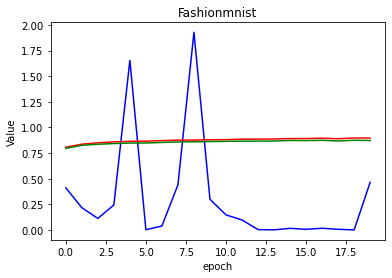

In [5]:
#P1a
training(ftrn_load,ftst_load,model,"CEL","1A_model",20,0.0001,0,1) # (train,test,model,name,epoch,lr,weightdecay,savemodel(bool))

51087
60000
 Epoch: 0, Loss: 0.434701
Training Accuracy: 0.851450
8397
10000
Validation Accuracy:  0.8397
51248
60000
 Epoch: 1, Loss: 0.433003
Training Accuracy: 0.854133
8382
10000
Validation Accuracy:  0.8382
51756
60000
 Epoch: 2, Loss: 1.334354
Training Accuracy: 0.862600
8455
10000
Validation Accuracy:  0.8455
52305
60000
 Epoch: 3, Loss: 1.156834
Training Accuracy: 0.871750
8546
10000
Validation Accuracy:  0.8546
52516
60000
 Epoch: 4, Loss: 1.725104
Training Accuracy: 0.875267
8544
10000
Validation Accuracy:  0.8544
51582
60000
 Epoch: 5, Loss: 0.003430
Training Accuracy: 0.859700
8399
10000
Validation Accuracy:  0.8399
52713
60000
 Epoch: 6, Loss: 0.232060
Training Accuracy: 0.878550
8580
10000
Validation Accuracy:  0.858
52864
60000
 Epoch: 7, Loss: 0.518701
Training Accuracy: 0.881067
8618
10000
Validation Accuracy:  0.8618
52540
60000
 Epoch: 8, Loss: 0.096763
Training Accuracy: 0.875667
8532
10000
Validation Accuracy:  0.8532
53216
60000
 Epoch: 9, Loss: 0.249890
Training 

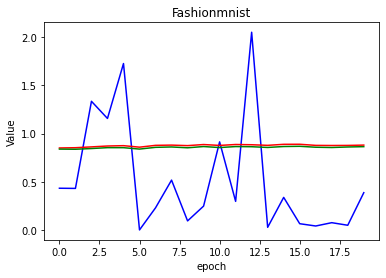

In [6]:
#P1b
class model (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784,196)
        self.l2 = nn.Linear(196,49)
        self.l3 = nn.Linear(49,10)
        self.tanh = nn.Tanh()
    def forward(self, x):
        x = self.tanh(self.l1(x))
        x = self.tanh(self.l2(x))
        x = self.l3(x)
        return x
dmodel = model()
dmodel.to(device)
training(ftrn_load,ftst_load,dmodel,"CEL","1B_model",20,0.001,0.001,1) #(train,test,model,name,epoch,lr,weightdecay,savemodel(bool))


In [7]:
class dropout_model (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784,196)
        self.l2 = nn.Linear(196,49)
        self.l3 = nn.Linear(49,10)
        self.drop1 = nn.Dropout(0.3)
        self.drop2 = nn.Dropout(0.3)
        self.tanh = nn.Tanh()
    def forward(self, x):
        x = self.tanh(self.l1(x))
        x = self.drop1(x)
        x = self.tanh(self.l2(x))
        x = self.drop2(x)
        x = self.l3(x)
        return x
dropout_model = dropout_model()
dropout_model.to(device)

dropout_model(
  (l1): Linear(in_features=784, out_features=196, bias=True)
  (l2): Linear(in_features=196, out_features=49, bias=True)
  (l3): Linear(in_features=49, out_features=10, bias=True)
  (drop1): Dropout(p=0.3, inplace=False)
  (drop2): Dropout(p=0.3, inplace=False)
  (tanh): Tanh()
)

49158
60000
 Epoch: 0, Loss: 0.169007
Training Accuracy: 0.819300
8016
10000
Validation Accuracy:  0.8016
50249
60000
 Epoch: 1, Loss: 0.501345
Training Accuracy: 0.837483
8211
10000
Validation Accuracy:  0.8211
50629
60000
 Epoch: 2, Loss: 0.667759
Training Accuracy: 0.843817
8291
10000
Validation Accuracy:  0.8291
51344
60000
 Epoch: 3, Loss: 0.845185
Training Accuracy: 0.855733
8345
10000
Validation Accuracy:  0.8345
50678
60000
 Epoch: 4, Loss: 0.187823
Training Accuracy: 0.844633
8255
10000
Validation Accuracy:  0.8255
51496
60000
 Epoch: 5, Loss: 0.042656
Training Accuracy: 0.858267
8424
10000
Validation Accuracy:  0.8424
51391
60000
 Epoch: 6, Loss: 0.003609
Training Accuracy: 0.856517
8454
10000
Validation Accuracy:  0.8454
50617
60000
 Epoch: 7, Loss: 0.239247
Training Accuracy: 0.843617
8249
10000
Validation Accuracy:  0.8249
51425
60000
 Epoch: 8, Loss: 0.060703
Training Accuracy: 0.857083
8383
10000
Validation Accuracy:  0.8383
51991
60000
 Epoch: 9, Loss: 0.336266
Training

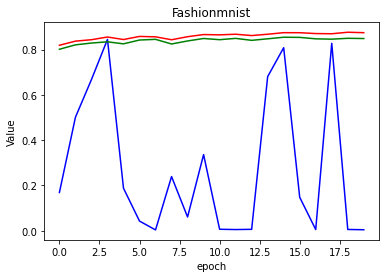

In [9]:
# P1c
training(ftrn_load,ftst_load,dropout_model,"CEL","1C_model",20,0.001,0,1) #train,test,model,name,epoch,lr,weightdecay,savemodel(bool)

53756
60000
 Epoch: 0, Loss: 0.307896
Training Accuracy: 0.895933
8759
10000
Validation Accuracy:  0.8759
53915
60000
 Epoch: 1, Loss: 0.300208
Training Accuracy: 0.898583
8780
10000
Validation Accuracy:  0.878
53988
60000
 Epoch: 2, Loss: 0.298561
Training Accuracy: 0.899800
8788
10000
Validation Accuracy:  0.8788
54036
60000
 Epoch: 3, Loss: 0.258166
Training Accuracy: 0.900600
8795
10000
Validation Accuracy:  0.8795
54048
60000
 Epoch: 4, Loss: 0.293449
Training Accuracy: 0.900800
8790
10000
Validation Accuracy:  0.879
54076
60000
 Epoch: 5, Loss: 0.264893
Training Accuracy: 0.901267
8796
10000
Validation Accuracy:  0.8796
54084
60000
 Epoch: 6, Loss: 0.269536
Training Accuracy: 0.901400
8794
10000
Validation Accuracy:  0.8794
54086
60000
 Epoch: 7, Loss: 0.250077
Training Accuracy: 0.901433
8792
10000
Validation Accuracy:  0.8792
54109
60000
 Epoch: 8, Loss: 0.279577
Training Accuracy: 0.901817
8799
10000
Validation Accuracy:  0.8799
54114
60000
 Epoch: 9, Loss: 0.266416
Training A

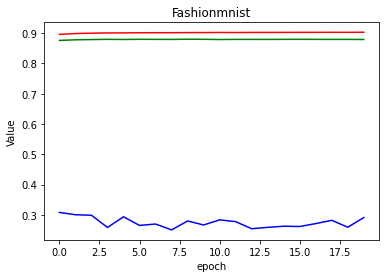

In [12]:
#P1da
model_d1 = model()
model_d1.load_state_dict(torch.load('1B_model'), strict=False)
model_d1.to(device)
training(ftrn_load, ftst_load, model_d1,"CEL", "1d1_model", 20, 0.001, 0.001, 1) #(train,test,model,name,epoch,lr,weightdecay,savemodel(bool))



52712
60000
 Epoch: 0, Loss: 0.356246
Training Accuracy: 0.878533
8583
10000
Validation Accuracy:  0.8583
52866
60000
 Epoch: 1, Loss: 0.393925
Training Accuracy: 0.881100
8558
10000
Validation Accuracy:  0.8558
52894
60000
 Epoch: 2, Loss: 0.336296
Training Accuracy: 0.881567
8559
10000
Validation Accuracy:  0.8559
52996
60000
 Epoch: 3, Loss: 0.365693
Training Accuracy: 0.883267
8572
10000
Validation Accuracy:  0.8572
52980
60000
 Epoch: 4, Loss: 0.348464
Training Accuracy: 0.883000
8620
10000
Validation Accuracy:  0.862
52977
60000
 Epoch: 5, Loss: 0.342554
Training Accuracy: 0.882950
8589
10000
Validation Accuracy:  0.8589
53040
60000
 Epoch: 6, Loss: 0.340399
Training Accuracy: 0.884000
8602
10000
Validation Accuracy:  0.8602
53047
60000
 Epoch: 7, Loss: 0.336358
Training Accuracy: 0.884117
8598
10000
Validation Accuracy:  0.8598
53073
60000
 Epoch: 8, Loss: 0.331754
Training Accuracy: 0.884550
8631
10000
Validation Accuracy:  0.8631
53087
60000
 Epoch: 9, Loss: 0.322101
Training 

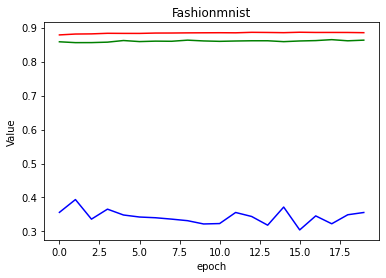

In [13]:
#P1db
class dropout_model (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784,196)
        self.l2 = nn.Linear(196,49)
        self.l3 = nn.Linear(49,10)
        self.drop1 = nn.Dropout(0.3)
        self.drop2 = nn.Dropout(0.3)
        self.tanh = nn.Tanh()
    def forward(self, x):
        x = self.tanh(self.l1(x))
        x = self.drop1(x)
        x = self.tanh(self.l2(x))
        x = self.drop2(x)
        x = self.l3(x)
        return x
model_d2 = dropout_model()
model_d2.load_state_dict(torch.load('1C_model'))
model_d2.to(device)
training(ftrn_load, ftst_load, model_d2,"CEL", "1d2_model", 20, 0.001, 0, 1)

In [ ]:
#p2

f_train = pd.read_csv("Data/house_train.csv")
f_test = pd.read_csv("Data/house_test.csv")

#ftrain = torchvision.datasets.FashionMNIST("./Data",download=True,transform=transforms.Compose([transforms.ToTensor()]))
#ftest =  torchvision.datasets.FashionMNIST("./Data", download=True, train=False, transform=transforms.Compose([transforms.ToTensor()]))

house_ftrn_load = torch.utils.data.DataLoader(f_train, batch_size = 2,shuffle = True)
house_ftst_load = torch.utils.data.DataLoader(f_test, batch_size = 2,shuffle = False)

#std = StandardScaler()
#sXtrain = std.fit_transform(f_train)
#sXtest = std.transform(f_test)

#shouse_ftrn_load = torch.utils.data.DataLoader(sXtrain, batch_size = 2,shuffle = True)
#shouse_ftst_load = torch.utils.data.DataLoader(sXtest, batch_size = 2,shuffle = False)

In [ ]:
class p2model (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784,196)
        self.l2 = nn.Linear(196,49)
        self.l3 = nn.Linear(49,12)
        self.l4 = nn.Linear(12,1)
        self.tanh = nn.Tanh()
    def forward(self, x):
        x = self.tanh(self.l1(x))
        x = self.tanh(self.l2(x))
        x = self.tanh(self.l3(x))
        x = self.l4
        return x
ddmodel = p2model()
ddmodel.to(device)
training(house_ftrn_load, house_ftst_load, ddmodel,"MSE", "P2a_model", 3, 0.001, 0, 1)